In [15]:
import numpy as np
import pandas as pd

In [49]:
training_data=pd.read_csv("x_y_train.csv")
testing_data=pd.read_csv("x_test.csv")

In [50]:
y_train=training_data['airline_sentiment']

In [51]:
y_train=np.array(y_train)
y_train.shape

(10980,)

In [52]:
x_train=training_data['text']
x_train=np.array(x_train)

In [53]:
x_train.shape

(10980,)

In [54]:
x_test=testing_data['text']
x_test=np.array(x_test)

In [55]:
x_test.shape

(3660,)

In [36]:
from nltk.tokenize import word_tokenize

In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [58]:
x_train=[word_tokenize(i) for i in x_train]
x_test=[word_tokenize(i) for i in x_test]

In [63]:
from nltk.corpus import stopwords
stops=stopwords.words('english')

In [67]:
import string
punctuations=list(string.punctuation)
stops+=punctuations

In [77]:
def get_simple_tag(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

In [78]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer=WordNetLemmatizer()

In [79]:
def cleaned_data(words,stops):
    output=[]
    for w in words:
        if w.lower() not in stops:
            pos=pos_tag([w])
            x=lemmatizer.lemmatize(w,pos=get_simple_tag(pos[0][1]))
            output.append(x)
    return output
            

In [80]:
x_train=[cleaned_data(i,stops) for i in x_train]
x_test=[cleaned_data(i,stops) for i in x_test]

In [83]:
len(x_train)

10980

In [84]:
len(y_train)

10980

In [86]:
len(x_test)

3660

In [100]:
x_train1=["".join(i) for i in x_train]
x_test1=["".join(i) for i in x_test]

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

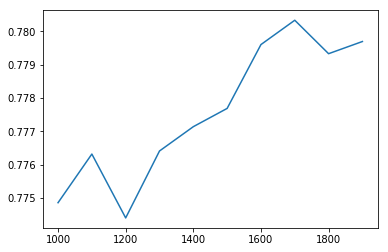

In [115]:
x=[]
y=[]
for i in range(1000,2000,100):
    clf=CountVectorizer(max_features=i)
    x_train=clf.fit_transform(x_train1)
    clf1=LogisticRegression(multi_class='ovr',solver='newton-cg')
    x.append(i)
    y.append(cross_val_score(clf1,x_train,y_train,cv=3).mean())
plt.plot(x,y)
plt.show()

In [116]:
clf=CountVectorizer(max_features=1700)
x_train=clf.fit_transform(x_train1)

In [118]:
x_test=clf.transform(x_test1)

In [119]:
clf=LogisticRegression(multi_class='ovr',solver='newton-cg')
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
y_pred=clf.predict(x_test)

In [121]:
np.savetxt('y_pred.csv',y_pred,fmt="%s")